1) Prepare a classification model using SVM for salary data 

* Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual


## Import necessary lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC

## Import dataset

In [2]:
# training data 
training_data = pd.read_csv('SalaryData_Train(1).csv')

In [3]:
training_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
testing_data = pd.read_csv('SalaryData_Test(1).csv')
testing_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Initial Analysis

In [5]:
training_data.shape

(30161, 14)

In [6]:
training_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
testing_data.shape

(15060, 14)

In [9]:
testing_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
testing_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
testing_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<AxesSubplot:>

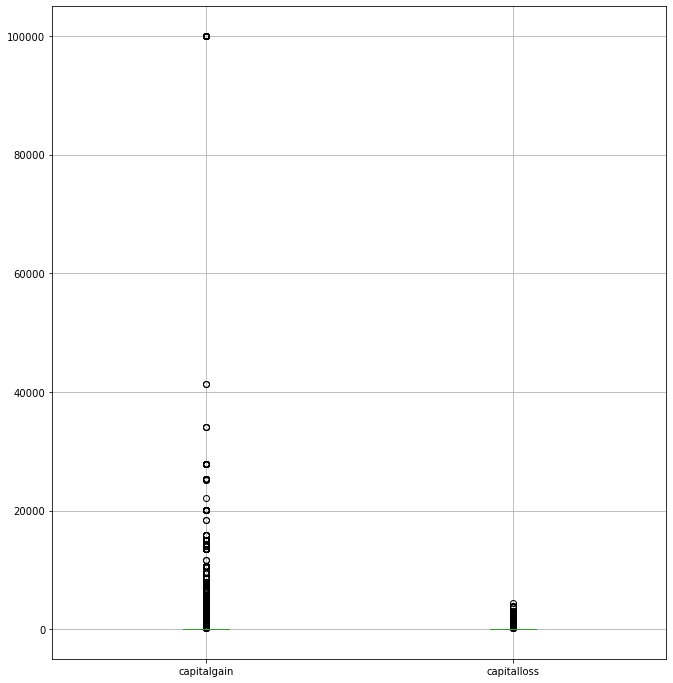

In [13]:
plt.figure(figsize= (11,12))
training_data.boxplot(column=['capitalgain','capitalloss'])

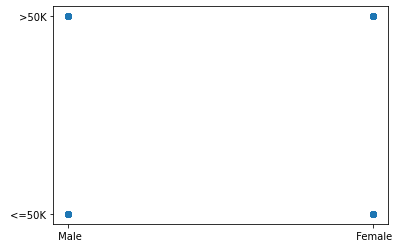

In [14]:
plt.scatter(x = 'sex',y = 'Salary',data = training_data)

In [15]:
def count_plot(data,columns):
    plt.figure(figsize=(15,10))
    for indx,var in enumerate(columns):
        plt.subplot(5,3,indx+1)
        g = sns.countplot(data[var],hue=data['Salary'])
    plt.tight_layout()
feature = training_data.columns.tolist()
feature.remove('Salary')
feature

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

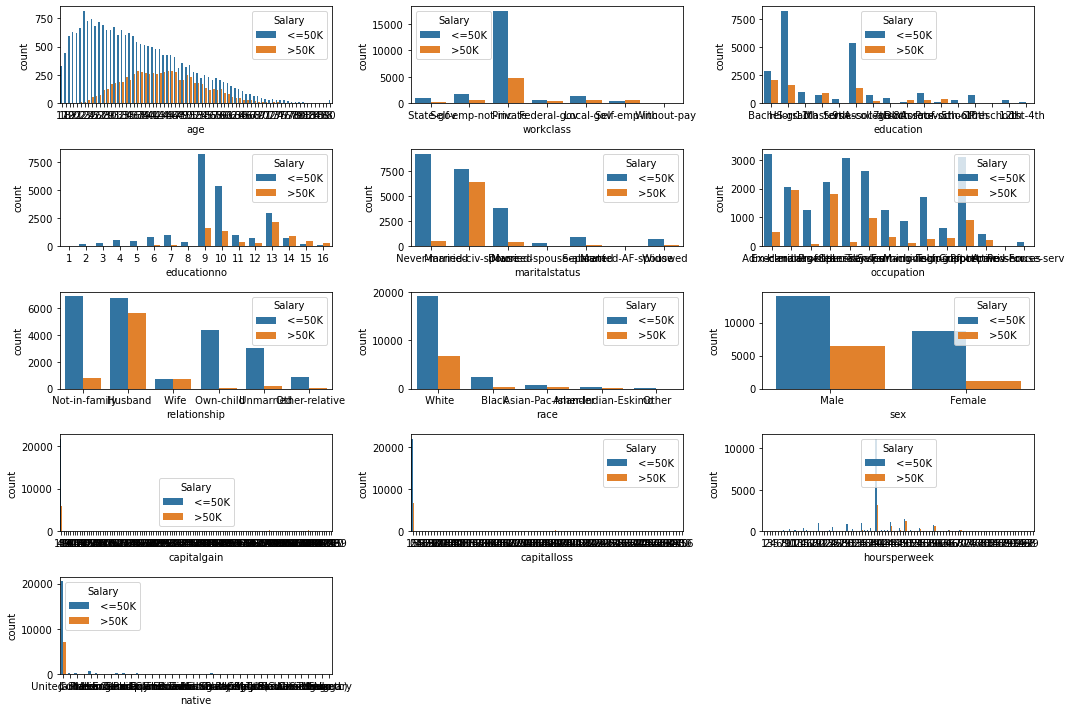

In [16]:
count_plot(training_data,feature)

In [17]:
categorical_data = training_data.select_dtypes(exclude=[np.number])

In [18]:
categorical_data

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [19]:
columns = categorical_data.columns
columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:>

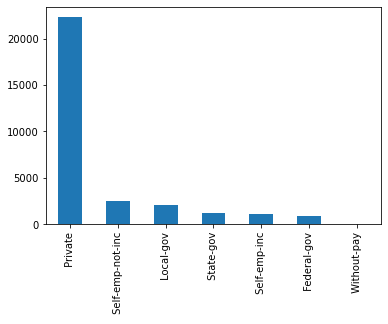

In [20]:
categorical_data['workclass'].value_counts().plot(kind ='bar')

<AxesSubplot:>

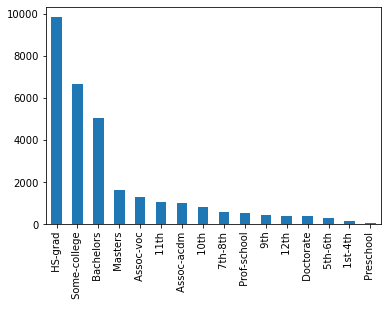

In [21]:
categorical_data['education'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

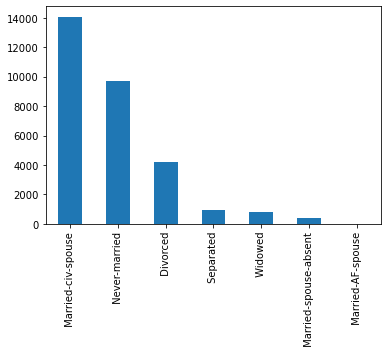

In [22]:
categorical_data['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

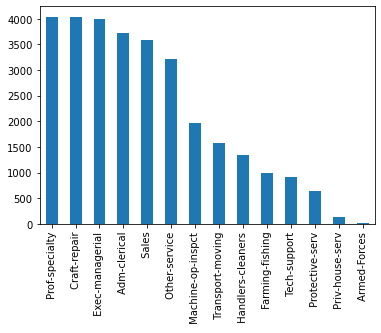

In [23]:
categorical_data['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

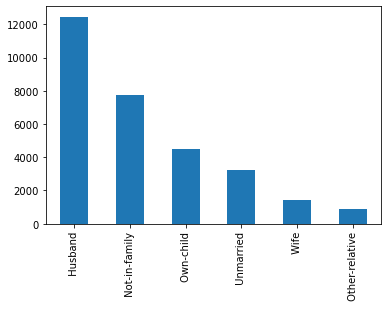

In [24]:
categorical_data['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

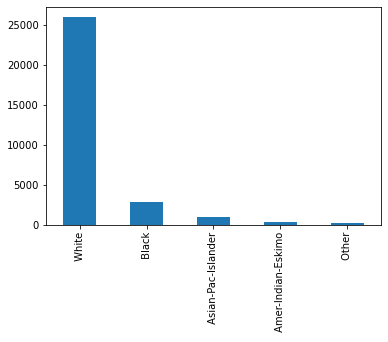

In [25]:
categorical_data['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

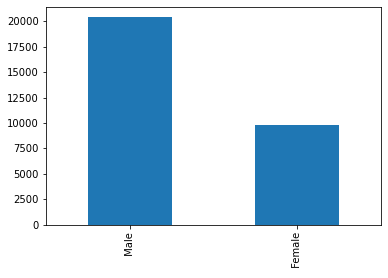

In [26]:
categorical_data['sex'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

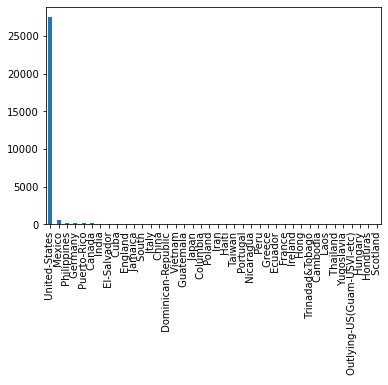

In [27]:
categorical_data['native'].value_counts().plot(kind='bar')

<AxesSubplot:>

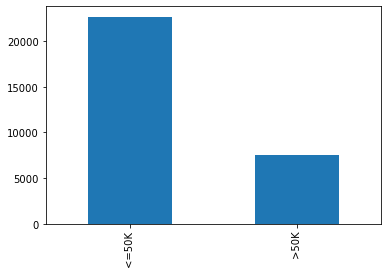

In [28]:
categorical_data['Salary'].value_counts().plot(kind='bar')

In [29]:
categorical_testing = testing_data.select_dtypes(exclude=[np.number])

In [30]:
categorical_testing

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [31]:
categorical_testing.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:>

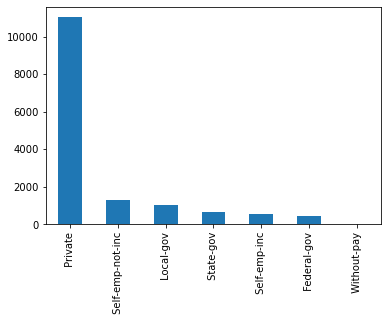

In [32]:
categorical_testing['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

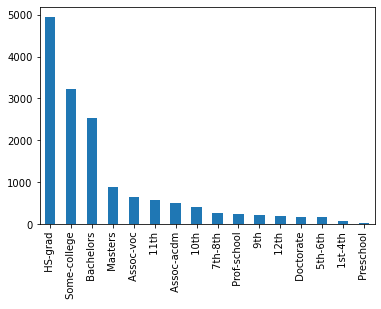

In [33]:
categorical_testing['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

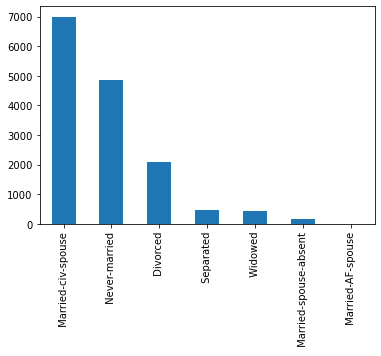

In [34]:
categorical_testing['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

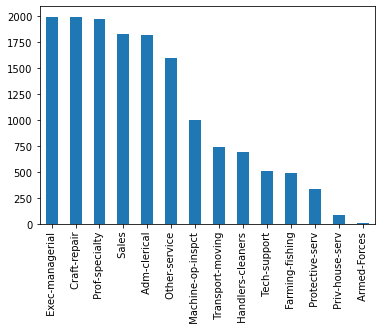

In [35]:
categorical_testing['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

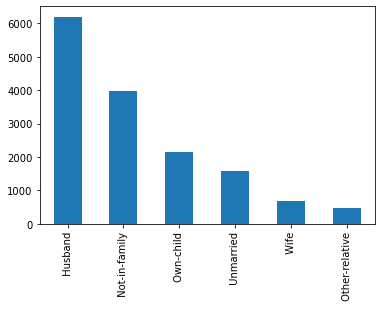

In [36]:
categorical_testing['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

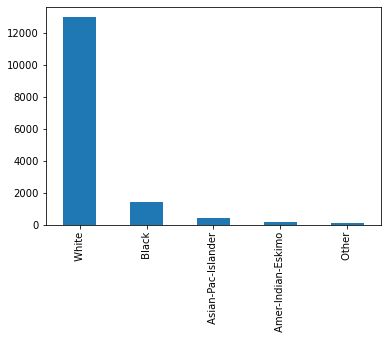

In [37]:
categorical_testing['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

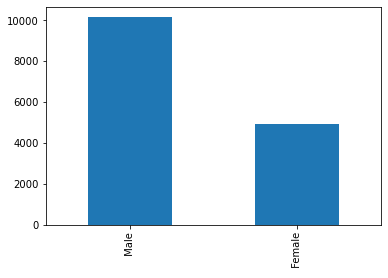

In [38]:
categorical_testing['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

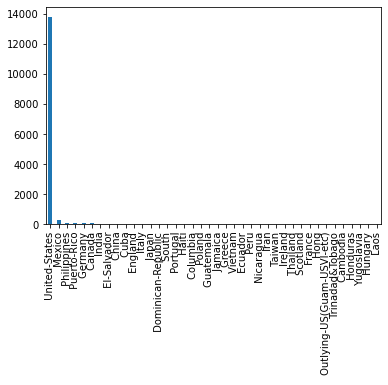

In [39]:
categorical_testing['native'].value_counts().plot(kind='bar')

<AxesSubplot:>

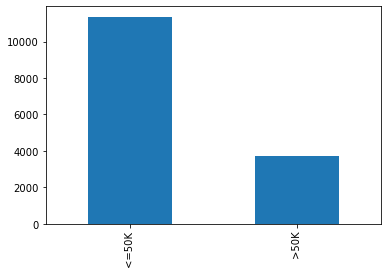

In [40]:
categorical_testing['Salary'].value_counts().plot(kind='bar')

In [41]:
total_data = pd.concat([training_data,testing_data])

In [42]:
total_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [43]:
total_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [44]:
total_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [45]:
total_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [46]:
le = LabelEncoder()
total_data['workclass']=le.fit_transform(total_data['workclass'])
total_data['education']=le.fit_transform(total_data['education'])
total_data['maritalstatus']=le.fit_transform(total_data['maritalstatus'])
total_data['occupation']=le.fit_transform(total_data['occupation'])
total_data['relationship']=le.fit_transform(total_data['relationship'])
total_data['race']=le.fit_transform(total_data['race'])
total_data['sex']=le.fit_transform(total_data['sex'])
total_data['native']=le.fit_transform(total_data['native'])
total_data['Salary']=le.fit_transform(total_data['Salary'])

In [47]:
total_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [48]:
#Here Salary feature is the target variable and we have to do classification based on whether the
#Salary of particular individual is <=50,000 or >50,000

## Use minimax scalar 

In [49]:
array = total_data.values

In [50]:
scalar = MinMaxScaler()
scalar_data = scalar.fit_transform(array)
df = pd.DataFrame(scalar_data,columns=total_data.columns)

In [51]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
45217,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
45218,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
45219,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


## Model building

In [59]:
x = df.drop(labels = 'Salary',axis = 1)
y = df[['Salary']]

In [60]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564


In [61]:
y.head()

,Salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<AxesSubplot:>

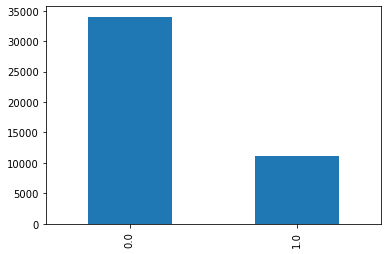

In [62]:
y['Salary'].value_counts().plot(kind = 'bar')

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [64]:
x_train.shape,y_train.shape

((31654, 13), (31654, 1))

In [65]:
x_test.shape,y_test.shape

((13567, 13), (13567, 1))

## Use Hyperparameter

In [ ]:
# clf = SVC()
#param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
#gsv = GridSearchCV(clf,param_grid,cv = 10)
#gsv.fit(x_train.values,y_train.values)

## Model training

In [67]:
svm_model = SVC(C=0.1,gamma=50,kernel='rbf',class_weight= {0:1,1:2})
svm_model.fit(x_train,y_train)

SVC(C=0.1, class_weight={0: 1, 1: 2}, gamma=50)

In [68]:
y_train_pred = svm_model.predict(x_train)

In [69]:
accuracy_score(y_train,y_train_pred)

0.8140519365640994

In [70]:
confusion_matrix(y_train,y_train_pred)

array([[21923,  1902],
       [ 3984,  3845]], dtype=int64)

In [71]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     23825
         1.0       0.67      0.49      0.57      7829

    accuracy                           0.81     31654
   macro avg       0.76      0.71      0.72     31654
weighted avg       0.80      0.81      0.80     31654



In [72]:
# check testing data
y_test_pred = svm_model.predict(x_test)

In [73]:
accuracy_score(y_test,y_test_pred)

0.7989238593646347

In [74]:
confusion_matrix(y_test,y_test_pred)

array([[9298,  890],
       [1838, 1541]], dtype=int64)

In [75]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     10188
         1.0       0.63      0.46      0.53      3379

    accuracy                           0.80     13567
   macro avg       0.73      0.68      0.70     13567
weighted avg       0.78      0.80      0.79     13567

